# MODELS

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn
from KNN import organize_and_split, standard_confusion_matrix, get_KNN, get_gridsearch_params, get_true_values, plot_ks
filename = '../Data/heart-disease-cleaned.csv'


### The organize_and_split function splits the data into training and test sets with training=0.7 and test=0.3

In [19]:
X_train, X_test, y_train, y_test = organize_and_split(filename)

### KNN with K = 1

In [20]:
get_KNN(X_train, X_test, y_train, y_test, n_neighbors=1)

K =  1

Accuracy:  0.844444444444

Error:  0.155555555556

Confusion Matrix:  [[ 35.   8.]
 [  6.  41.]]


### Using GridSearch to fit different parameters to the classifier
#### GridSearchCV is a cross validation algorithm. It is passed a parameter grid and performs cross validation test for every possible combination of parameters. In this case, the parameters I'm trying to optimize are the number of neighbors passed to the classifier

In [23]:
clf = KNeighborsClassifier(n_jobs=-1)

In [24]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
gs = get_gridsearch_params(clf, X_train, y_train)

### The 'best params' attribute gives the parameters that had the best score

In [28]:
gs.best_params_


{'n_neighbors': 8}

### The 'best score' attribute gives the score of the best parameters

In [30]:
gs.best_score_

0.81159420289855078

#### Applying this to our test data:

In [31]:
get_KNN(X_train, X_test, y_train, y_test, n_neighbors=8)

K =  8

Accuracy:  0.866666666667

Error:  0.133333333333

Confusion Matrix:  [[ 31.   2.]
 [ 10.  47.]]


#### We have increased our accuracy by 0.02

## However, I decided to try differing values for K on just the test data. 

1 0.844444444444
2 0.833333333333
3 0.9
4 0.844444444444
5 0.888888888889
6 0.888888888889
7 0.888888888889
8 0.866666666667
9 0.877777777778
10 0.866666666667
11 0.855555555556
12 0.855555555556
13 0.855555555556
14 0.866666666667
15 0.866666666667
16 0.866666666667
17 0.855555555556
18 0.844444444444
19 0.844444444444


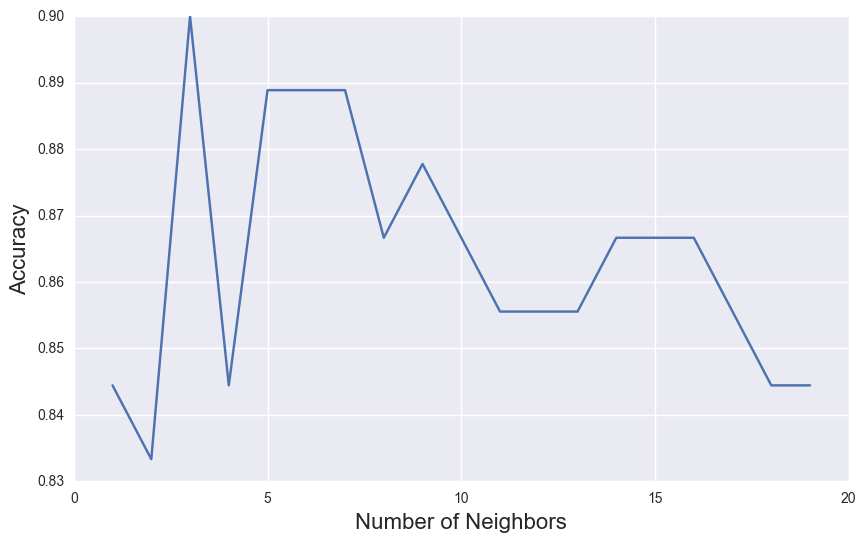

In [36]:
model = KNeighborsClassifier
plot_ks(model, filename)

### The plot shows the accuracy score against the values for K
#### We can see that the optimal value for K for our test data is 3, where we get an accuracy score of 0.9. 

In [37]:
get_KNN(X_train, X_test, y_train, y_test, n_neighbors=3)

K =  3

Accuracy:  0.9

Error:  0.1

Confusion Matrix:  [[ 34.   2.]
 [  7.  47.]]


#### When predicting outcomes, it is important to take into consideration the generalizability of our models. Cross validation is done on our training sets to optimize for the general cases of the data. In this case, the cross validation revealed that the optimal value of K for the training data was 8. Our test data, however, was more optimal for K = 3. If we randomly split the data into different training and test sets, we will naturally have different optimal values for K. This is why it is important to generalize our models to best predict new incoming data

##### I used the sci-kit learn library for all modeling, pandas and numpy for all data cleaning and calculations
##### When cleaning the data, I checked all values for all columns. When I found missing data, I determined that it would not be detrimental to the integrity of the data to delete the instances that had missing data. In this case we were not interested in predicting the severity of the diagnosis, just that there was one, so I changed the diagnosis column to either yes (1) or no (0). When it came to modelling, it was necessary to keep the correct values for the categorical variables to create dummy variables.
##### Normalization was necessary. Because KNN uses a distance metric to predict, if we did not scale our data, the variables with the higher ranges would distort prediction of the algorithm

#### I received information about the dataset from here: http://archive.ics.uci.edu/ml/datasets/Heart+Disease